<a href="https://colab.research.google.com/github/Aamir195/Failure_Predction/blob/main/Maintenance_cost_reduction_through_predictive_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Neccesasary libraries for basic things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import datetime as datetime
from numpy import mean

# Libraries for Model Making
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
## conecring with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("drive/MyDrive/hack/data.csv")

In [ ]:
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [ ]:
data.shape

(124494, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [ ]:
data["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
Dict = {
    1 :"metric1",
    2:"metric2",
    3:"metric3",
    4:"metric4",
    5:"metric5",
    6:"metric6",
    7:"metric7",
    8:"metric8",
    9:"metric9"
}

In [ ]:
numZero =[]
for i in Dict:
  numZero =(data[Dict[i]]==0).sum()
  print(numZero)


11
118110
115359
115156
0
0
123036
123036
97357


In [ ]:
(data['metric1']==0).sum()

11

In [ ]:
data.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [ ]:
data["device"].nunique()

1169

In [ ]:

import dateutil

In [ ]:
# ============ Dates range ============ #
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=False)
date_min = data.date.min()
date_max = data.date.max()

In [ ]:
date_min , date_max

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-11-02 00:00:00'))

In [ ]:

# ============ Devices range ============ #
init_devices = data[data.date == data.date.min()].device.count()  # Number of Initial devices
end_devices = data[data.date == data.date.max()].device.count()  # Number of Final devices
failed_devices = data.failure.sum()  # Failed devices
failure_records = data.failure.count()  # Number of records of Failures (Number of Rows in DF)

In [ ]:
init_devices, end_devices

(1163, 31)

In [ ]:
failed_devices, failure_records

(106, 124494)

In [ ]:
# ============ Calculation of Failure rates and survival rates ============ #

failure_rate = (failed_devices / failure_records)
print('failure rate :' + str(round(failure_rate * 100, 2)) + '%')

replace_rate = ((init_devices - end_devices) / init_devices)
print('replace_rate: ' + str(round(replace_rate * 100, 2)) + '%')

survival_rate = 1 - replace_rate
print('survival_rate: '+ str(round(survival_rate * 100, 2)) + '%')

failure rate :0.09%
replace_rate: 97.33%
survival_rate: 2.67%


In [ ]:
# ============ Graphic Function ============ #
def gplot(x, y, xlabel, ylabel, tittle, bar=False):

    figure, xplot = plt.subplots()

    if bar is True:
        index = np.arange(len(x))
        xplot.bar(index, y.sort_values())
    else:
        xplot.plot(x, y)
        xplot.xaxis.set_major_locator(mdates.MonthLocator())
        xplot.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        xplot.xaxis.set_minor_locator(mdates.DayLocator())
        xplot.set_xlim(date_min, date_max)

        figure.autofmt_xdate()

    plt.ylabel(ylabel, fontsize=5)
    plt.xlabel(xlabel, fontsize=5)
    plt.title(tittle)

    return plt.show()

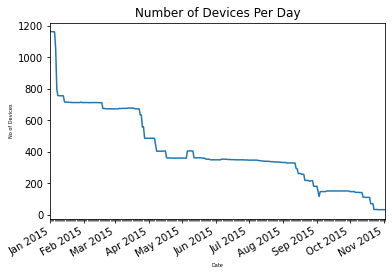

In [ ]:

# ============ No of Devices each day ============ #

devices_per_date = data.groupby('date')[['device']].count()
# print(devices_per_date)
# Visualise the number of devices per each day
gplot(x=devices_per_date.index, y=devices_per_date,
      ylabel='No of Devices', xlabel='Date', tittle='Number of Devices Per Day')


In [ ]:
# create three more features based on date.
data.date = pd.to_datetime(data.date)

data['activedays']=data.date-data.date[0]

data['month']=data['date'].dt.month
data['week_day']=data.date.dt.weekday
data['week_day'].replace(0,7,inplace=True)
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3


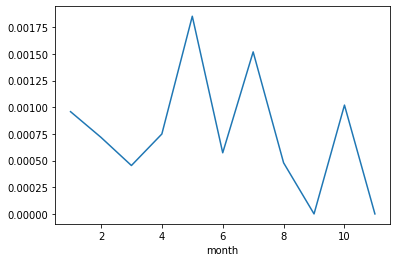

In [ ]:
data.groupby("month")["failure"].mean().plot()      ## failed devices per month

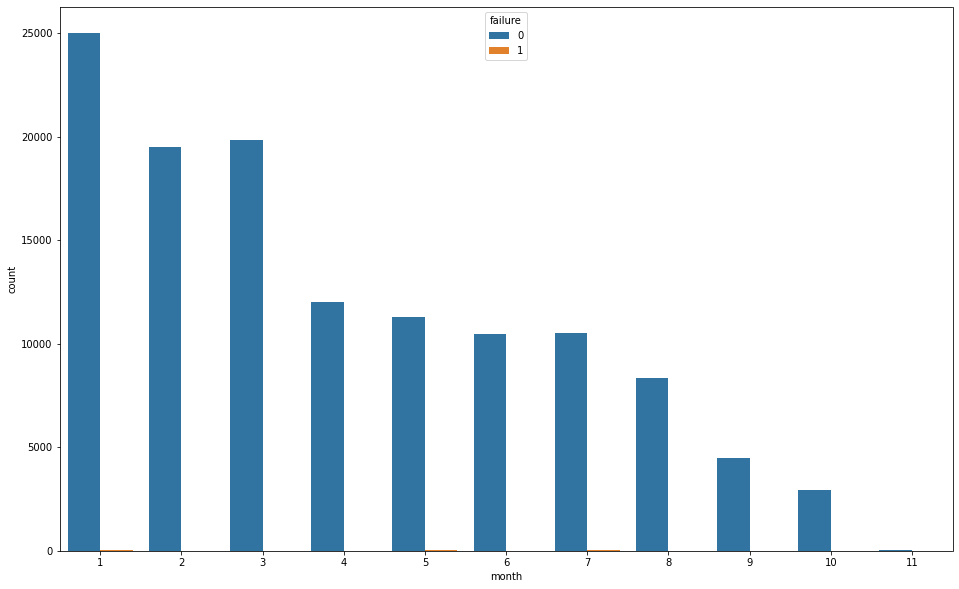

In [ ]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(x="month", hue="failure", data=data)

In [ ]:
max(data.date), min(data.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   date        124494 non-null  datetime64[ns] 
 1   device      124494 non-null  object         
 2   failure     124494 non-null  int64          
 3   metric1     124494 non-null  int64          
 4   metric2     124494 non-null  int64          
 5   metric3     124494 non-null  int64          
 6   metric4     124494 non-null  int64          
 7   metric5     124494 non-null  int64          
 8   metric6     124494 non-null  int64          
 9   metric7     124494 non-null  int64          
 10  metric8     124494 non-null  int64          
 11  metric9     124494 non-null  int64          
 12  activedays  124494 non-null  timedelta64[ns]
 13  month       124494 non-null  int64          
 14  week_day    124494 non-null  int64          
dtypes: datetime64[ns](1), int64(12), o

In [ ]:
data["device"].value_counts()

Z1F0KJDS     304
S1F0GGPP     304
S1F0FGBQ     304
S1F0EGMT     304
Z1F0GB8A     304
            ... 
Z1F151C1       5
Z1F0L4S8       5
S1F04KSC       4
W1F0WJFT       3
W1F1DA5��      1
Name: device, Length: 1169, dtype: int64

In [ ]:
data.shape

(124494, 15)

In [ ]:
data[data.device=="S1F01JE0"]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
1166,2015-01-02,S1F01JE0,0,109398680,0,0,0,6,410186,0,0,0,1 days,1,4
2329,2015-01-03,S1F01JE0,0,235562856,0,0,0,6,410186,0,0,0,2 days,1,5
3492,2015-01-04,S1F01JE0,0,235473648,0,0,0,6,410188,0,0,0,3 days,1,6
4654,2015-01-05,S1F01JE0,0,158246712,0,0,0,6,410888,0,0,0,4 days,1,7
5815,2015-01-06,S1F01JE0,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1


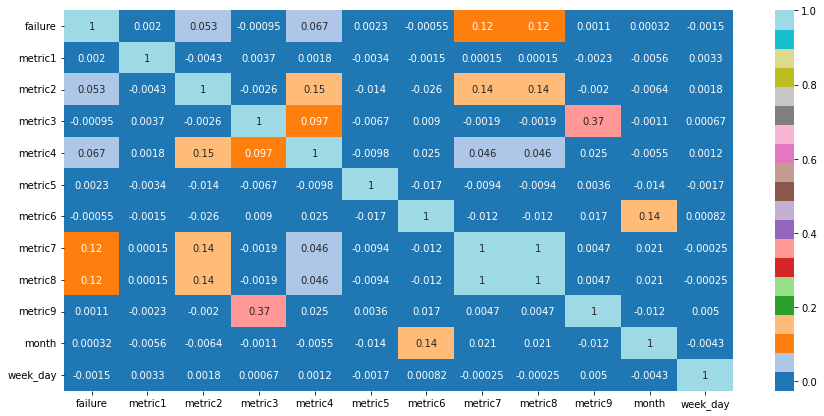

In [ ]:
plt.figure(figsize=(15, 7))
corr = data.corr()
sns.heatmap(corr , annot=True, cmap="tab20")

## High co-relation between metric7 and metric8

In [ ]:
## Last recoard of the device
df1 = data.groupby('device').agg({'date':max})

In [ ]:
df1.shape

(1169, 1)

In [ ]:
df1 = df1.reset_index()

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,70000,305 days,11,7


In [ ]:
df= pd.merge(df1,data,how='left',on=['device','date'])

df.shape

(1169, 15)

In [ ]:
df.head(13)

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1
5,S1F01R2B,2015-08-24,0,45858720,0,0,0,19,344875,0,0,3,235 days,8,7
6,S1F01TD5,2015-01-06,0,21103248,0,0,41,6,415259,0,0,1,5 days,1,1
7,S1F01XDJ,2015-04-16,0,240833760,0,0,0,8,429340,0,0,0,105 days,4,3
8,S1F023H2,2015-01-19,1,64499464,0,0,1,19,514661,16,16,3,18 days,1,7
9,S1F02A0J,2015-08-28,0,145708992,0,1,0,16,355584,0,0,0,239 days,8,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


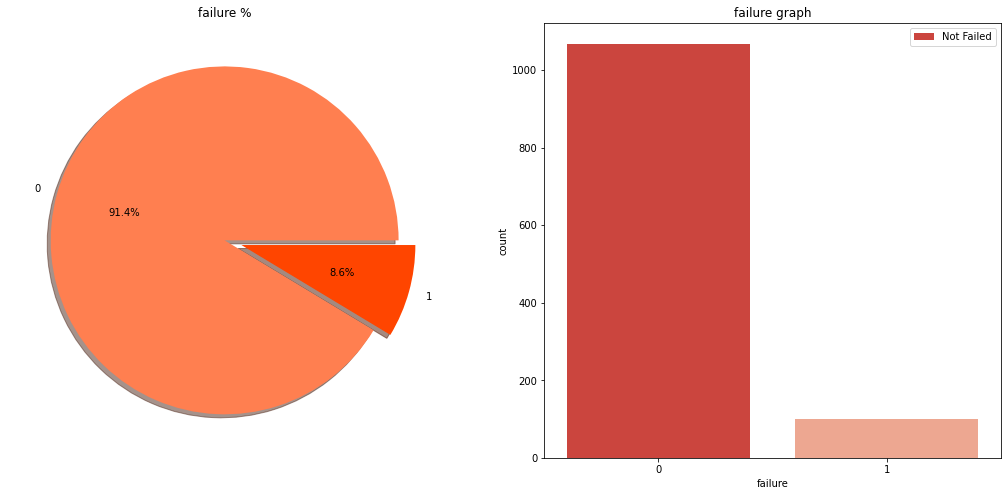

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['failure'].value_counts().plot.pie(colors = ['#ff7f50', '#ff4500'], explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0],shadow = True)
ax[0].set_title('failure %')
ax[0].set_ylabel('')
sns.countplot('failure', data = df, ax = ax[1], palette='Reds_r', )
ax[1].set_title('failure graph')
plt.legend(["Not Failed"])
# plt.legend(["failed"])
plt.show()

In [ ]:
df.tail()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2
1168,Z1F2PBHX,2015-04-06,0,130522432,0,0,0,5,164020,0,0,0,95 days,4,7


In [ ]:
df.head(7)

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5,1,1
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130,5,7
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5,1,1
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47,2,1
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5,1,1
5,S1F01R2B,2015-08-24,0,45858720,0,0,0,19,344875,0,0,3,235,8,7
6,S1F01TD5,2015-01-06,0,21103248,0,0,41,6,415259,0,0,1,5,1,1


In [ ]:
# change activedays datatype to numerical
def str_to_num(str):
    return str.split(' ')[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   device      1169 non-null   object         
 1   date        1169 non-null   datetime64[ns] 
 2   failure     1169 non-null   int64          
 3   metric1     1169 non-null   int64          
 4   metric2     1169 non-null   int64          
 5   metric3     1169 non-null   int64          
 6   metric4     1169 non-null   int64          
 7   metric5     1169 non-null   int64          
 8   metric6     1169 non-null   int64          
 9   metric7     1169 non-null   int64          
 10  metric8     1169 non-null   int64          
 11  metric9     1169 non-null   int64          
 12  activedays  1169 non-null   timedelta64[ns]
 13  month       1169 non-null   int64          
 14  week_day    1169 non-null   int64          
dtypes: datetime64[ns](1), int64(12), object(1), timedelta64

In [ ]:
df.activedays = df.activedays.astype('str')

df.activedays=df.activedays.apply(str_to_num)
df.activedays = df.activedays.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   device      1169 non-null   object        
 1   date        1169 non-null   datetime64[ns]
 2   failure     1169 non-null   int64         
 3   metric1     1169 non-null   int64         
 4   metric2     1169 non-null   int64         
 5   metric3     1169 non-null   int64         
 6   metric4     1169 non-null   int64         
 7   metric5     1169 non-null   int64         
 8   metric6     1169 non-null   int64         
 9   metric7     1169 non-null   int64         
 10  metric8     1169 non-null   int64         
 11  metric9     1169 non-null   int64         
 12  activedays  1169 non-null   int64         
 13  month       1169 non-null   int64         
 14  week_day    1169 non-null   int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 146.1+ KB


In [ ]:
y =df.failure

In [ ]:
X = df.drop(["date", "failure", "metric8"], axis=1)


In [ ]:
X.head()

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day
0,S1F01085,128832128,56,0,52,6,409404,0,7,5,1,1
1,S1F013BB,115676688,0,0,0,5,689161,0,0,130,5,7
2,S1F0166B,7441792,0,3,0,6,404786,0,0,5,1,1
3,S1F01E6Y,147350000,0,0,0,12,259491,0,0,47,2,1
4,S1F01JE0,185424928,0,0,0,6,412151,0,0,5,1,1


In [ ]:
le = LabelEncoder()
X.device = le.fit_transform(X.device)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   device      1169 non-null   int64
 1   metric1     1169 non-null   int64
 2   metric2     1169 non-null   int64
 3   metric3     1169 non-null   int64
 4   metric4     1169 non-null   int64
 5   metric5     1169 non-null   int64
 6   metric6     1169 non-null   int64
 7   metric7     1169 non-null   int64
 8   metric9     1169 non-null   int64
 9   activedays  1169 non-null   int64
 10  month       1169 non-null   int64
 11  week_day    1169 non-null   int64
dtypes: int64(12)
memory usage: 118.7 KB


In [ ]:
y.head(12)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
Name: failure, dtype: int64

## First -1

In [ ]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [ ]:
accuracy = []

model = RandomForestClassifier()
for train_index, test_index in skf.split(X, y):
  print("TRAIN :", train_index)
  print( "TEST: ", test_index)
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(X1_train, y1_train)
  pred = model.predict(X1_test)
  score = accuracy_score(pred, y1_test)
  accuracy.append(score)

print(accuracy)



TRAIN : [ 147  155  163  187  235  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  302  303
  304  305  306  307  308  309  310  311  312  313  314  315  316  317
  318  319  320  321  322  323  324  325  326  327  328  329  330  331
  332  333  334  335  336  337  338  339  340  341  342  343  344  345
  346  347  348  349  350  351  352  353  354  355  356  357  358  359
  360  361  362  363  364  365  366  367  368  369  370  371  372  373
  374  375  376  377  378  379  380  381  382  383  384  385  386  387
  388  389  390  391  392  393  394  395  396  397  398  399  400  401
  402  403  404  405  406  407  408  409  410  411  412  413  414  415
  416  417  418  419  420  421  422  423  424  425  426  427  428  42

In [ ]:
np.mean(accuracy)

0.913653204211144

In [ ]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       213
           1       0.94      0.75      0.83        20

    accuracy                           0.97       233
   macro avg       0.96      0.87      0.91       233
weighted avg       0.97      0.97      0.97       233



In [ ]:
print(confusion_matrix(y1_test, pred))

[[212   1]
 [  5  15]]


In [ ]:
np.max(accuracy)

0.9785407725321889

## after standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X.head()

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day
0,0,128832128,56,0,52,6,409404,0,7,5,1,1
1,1,115676688,0,0,0,5,689161,0,0,130,5,7
2,2,7441792,0,3,0,6,404786,0,0,5,1,1
3,3,147350000,0,0,0,12,259491,0,0,47,2,1
4,4,185424928,0,0,0,6,412151,0,0,5,1,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   device      1169 non-null   int64
 1   metric1     1169 non-null   int64
 2   metric2     1169 non-null   int64
 3   metric3     1169 non-null   int64
 4   metric4     1169 non-null   int64
 5   metric5     1169 non-null   int64
 6   metric6     1169 non-null   int64
 7   metric7     1169 non-null   int64
 8   metric9     1169 non-null   int64
 9   activedays  1169 non-null   int64
 10  month       1169 non-null   int64
 11  week_day    1169 non-null   int64
dtypes: int64(12)
memory usage: 158.7 KB


In [ ]:
# numerical features
num_cols = ['metric1','metric2','metric3','metric4', 'metric5', 'metric6', 'metric7', 'metric9', 'activedays', 'month', 'week_day']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X1_train[[i]])

    # transform the training data column
    X1_train[i] = scale.transform(X1_train[[i]])

    # transform the testing data column
    X1_test[i] = scale.transform(X1_test[[i]])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
accuracy = []


for train_index, test_index in skf.split(X, y):
  print("TRAIN :", train_index)
  print( "TEST: ", test_index)
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(X1_train, y1_train)
  pred = model.predict(X1_test)
  score = accuracy_score(pred, y1_test)
  accuracy.append(score)

print(accuracy)


TRAIN : [ 147  155  163  187  235  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  302  303
  304  305  306  307  308  309  310  311  312  313  314  315  316  317
  318  319  320  321  322  323  324  325  326  327  328  329  330  331
  332  333  334  335  336  337  338  339  340  341  342  343  344  345
  346  347  348  349  350  351  352  353  354  355  356  357  358  359
  360  361  362  363  364  365  366  367  368  369  370  371  372  373
  374  375  376  377  378  379  380  381  382  383  384  385  386  387
  388  389  390  391  392  393  394  395  396  397  398  399  400  401
  402  403  404  405  406  407  408  409  410  411  412  413  414  415
  416  417  418  419  420  421  422  423  424  425  426  427  428  42

In [ ]:
np.mean(accuracy)

0.8726312314295148

In [ ]:
print(classification_report(y1_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       213
           1       0.89      0.85      0.87        20

    accuracy                           0.98       233
   macro avg       0.94      0.92      0.93       233
weighted avg       0.98      0.98      0.98       233



In [ ]:
print(confusion_matrix(y1_test, pred))

[[211   2]
 [  3  17]]


# Resampling

In [ ]:
accuracy = []


for train_index, test_index in skf.split(X, y):
  print("TRAIN :", train_index)
  print( "TEST: ", test_index)
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(X1_train, y1_train)
  pred = model.predict(X1_test)
  score = accuracy_score(pred, y1_test)
  accuracy.append(score)

print(accuracy)


TRAIN : [ 147  155  163  187  235  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  302  303
  304  305  306  307  308  309  310  311  312  313  314  315  316  317
  318  319  320  321  322  323  324  325  326  327  328  329  330  331
  332  333  334  335  336  337  338  339  340  341  342  343  344  345
  346  347  348  349  350  351  352  353  354  355  356  357  358  359
  360  361  362  363  364  365  366  367  368  369  370  371  372  373
  374  375  376  377  378  379  380  381  382  383  384  385  386  387
  388  389  390  391  392  393  394  395  396  397  398  399  400  401
  402  403  404  405  406  407  408  409  410  411  412  413  414  415
  416  417  418  419  420  421  422  423  424  425  426  427  428  42

In [ ]:
np.mean(accuracy)

0.8803088661457761

In [ ]:
##Using SMOTE-ENN to balance the data
#Define model
model=RandomForestClassifier()
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))
print('Mean f1: %.4f' % np.mean(scores['test_f1_macro']))

Mean Accuracy: 0.9373
Mean Precision: 0.8042
Mean Recall: 0.8340
Mean f1: 0.8152
